In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/home/eshaan/Notes/Sem5/MachineLearning/Text mining data'

In [4]:
df = pd.read_csv('../winemag-data-small.csv',index_col=0)

In [5]:
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1.0,US,This tightly wound wine offers firm purple fru...,Marsh Estate Vineyard,90,50.0,Oregon,Willamette Valley,NaN,Paul Gregutt,@paulgwine,Roco 2015 Marsh Estate Vineyard Pinot Noir,Pinot Noir,Roco
2.0,France,The wine is initially soft and then begins to ...,Lieu-dit Les Epinats,87,NaN,Loire Valley,Saumur,NaN,Roger Voss,@vossroger,Cave de Saumur 2013 Lieu-dit Les Epinats (Sau...,Chenin Blanc,Cave de Saumur
3.0,US,"A rare find, this is a delightfully fun wine, ...",Noir de Noirs Old Vines,88,30.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Wellington 2013 Noir de Noirs Old Vines Alican...,Alicante Bouschet,Wellington


In [30]:
country = df.groupby('country').mean('points').sort_values('points')

In [31]:
country[:10]

,points,price
country,,
Ukraine,83.500000,9.500000
Mexico,84.571429,16.000000
Brazil,85.666667,25.500000
Chile,86.327044,19.693038
Morocco,86.500000,16.000000
Uruguay,86.666667,32.666667
Argentina,86.824373,25.323636
Czech Republic,87.000000,35.000000
Slovakia,87.000000,16.000000


In [15]:
df.description[:5]

1.0    This tightly wound wine offers firm purple fru...
2.0    The wine is initially soft and then begins to ...
3.0    A rare find, this is a delightfully fun wine, ...
4.0    This sweet, Moscato-based offering would pair ...
5.0    Full bodied and stuffed with fresh fruit flavo...
Name: description, dtype: object

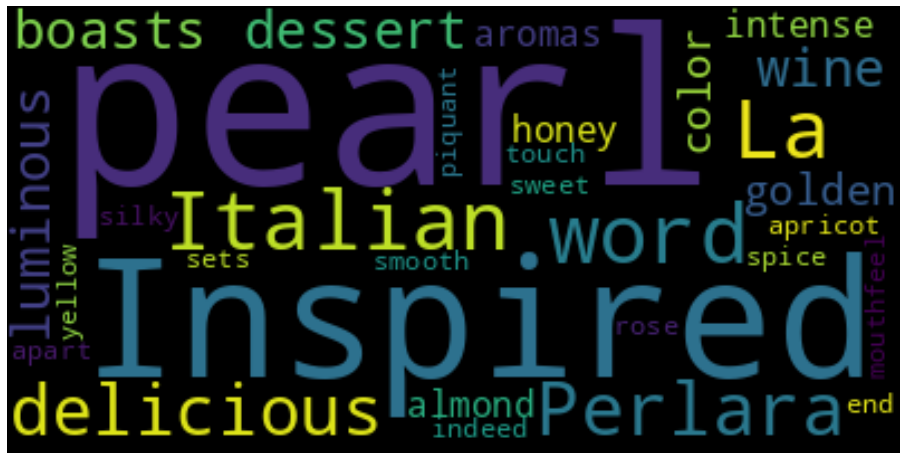

In [36]:
wc = WordCloud().generate(df.description[69])
plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

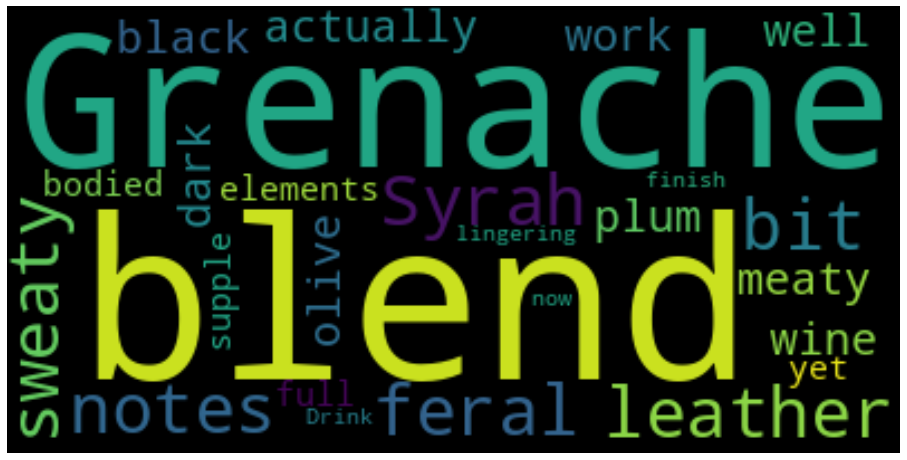

In [38]:
wc = WordCloud().generate(df.description[420])
plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Customizing the word cloud

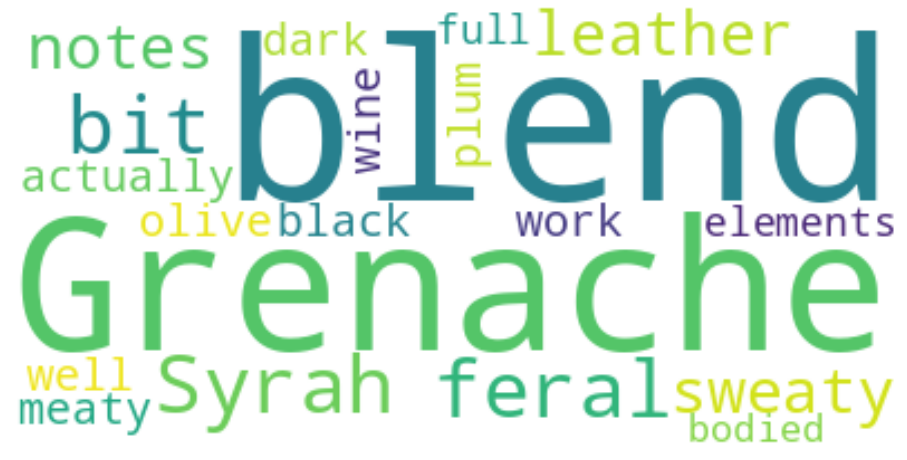

In [40]:
wc = WordCloud(max_font_size=100,max_words=20,background_color='white').generate(df.description[420])
plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
text = ' '.join(i for i in df.variety)

In [11]:
stop_w = set(STOPWORDS)
stop_w.update(['drink','now','wine','flavor','flavors'])

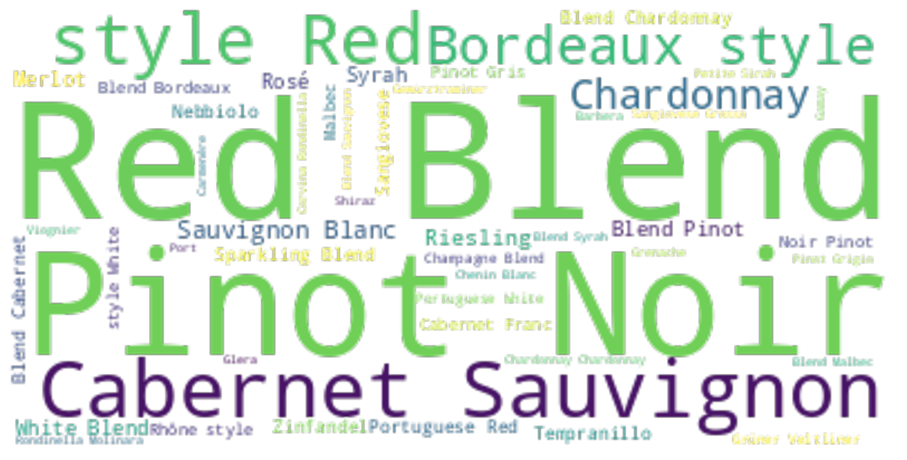

In [14]:
wc = WordCloud(mode = 'RGBA', max_font_size=100,stopwords=stop_w,max_words=50,background_color=None).generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='mitchell')
plt.axis('off')
plt.show()

In [18]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul